In [7]:
#importing Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [8]:
df = pd.read_csv('50_startups.csv')
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [14]:
X = df[['R&D Spend']]
y = df[['Profit']]
X = np.array(X).reshape(-1,1)
print(X)
y = np.array(y).reshape(-1,1)
print(y)

[[165349.2 ]
 [162597.7 ]
 [153441.51]
 [144372.41]
 [142107.34]
 [131876.9 ]
 [134615.46]
 [130298.13]
 [120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 94657.16]
 [ 91749.16]
 [ 86419.7 ]
 [ 76253.86]
 [ 78389.47]
 [ 73994.56]
 [ 67532.53]
 [ 77044.01]
 [ 64664.71]
 [ 75328.87]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 28754.33]
 [ 27892.92]
 [ 23640.93]
 [ 15505.73]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54

In [15]:
unique = np.unique(df['State'])
unique

array(['California', 'Florida', 'New York'], dtype=object)

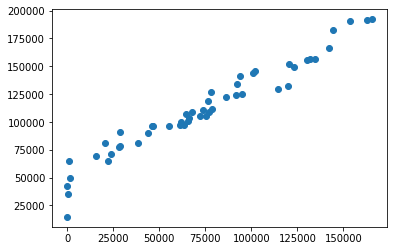

In [16]:
plt.scatter(X,y)
plt.show()

## Spliting Data into Training Set & Test Set 

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

## Feature Scalling

In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train)

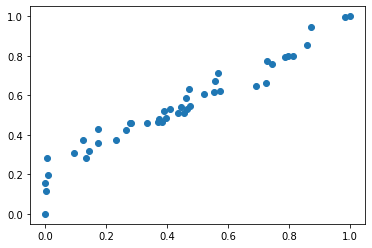

In [24]:
plt.scatter(X_train,y_train)

## Training the Model

In [26]:
modelDT = DecisionTreeRegressor(random_state=0)
modelDT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

[Text(0.5191532258064516, 0.9444444444444444, 'X[0] <= 0.469\nsquared_error = 0.049\nsamples = 45\nvalue = 0.535'),
 Text(0.2439516129032258, 0.8333333333333334, 'X[0] <= 0.158\nsquared_error = 0.02\nsamples = 27\nvalue = 0.394'),
 Text(0.07661290322580645, 0.7222222222222222, 'X[0] <= 0.005\nsquared_error = 0.013\nsamples = 9\nvalue = 0.227'),
 Text(0.03225806451612903, 0.6111111111111112, 'X[0] <= 0.002\nsquared_error = 0.004\nsamples = 3\nvalue = 0.092'),
 Text(0.016129032258064516, 0.5, 'squared_error = 0.006\nsamples = 2\nvalue = 0.078'),
 Text(0.04838709677419355, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.118'),
 Text(0.12096774193548387, 0.6111111111111112, 'X[0] <= 0.051\nsquared_error = 0.003\nsamples = 6\nvalue = 0.295'),
 Text(0.08064516129032258, 0.5, 'X[0] <= 0.007\nsquared_error = 0.002\nsamples = 2\nvalue = 0.239'),
 Text(0.06451612903225806, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 0.283'),
 Text(0.0967741935483871, 0.3888888888888889, 'squ

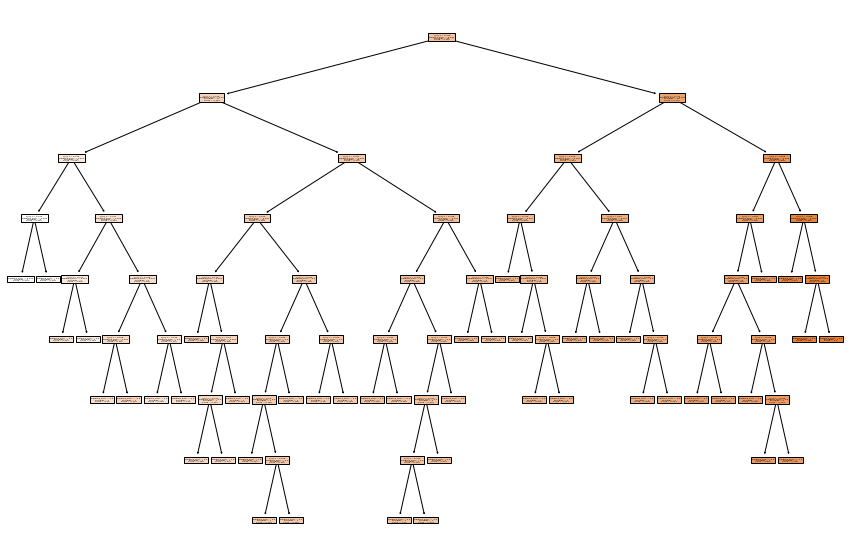

In [30]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(modelDT,filled=True)

## Prediction

In [32]:
X_test

array([[0.39946683],
       [0.60884455],
       [0.61635061],
       [0.16869099],
       [0.92798459]])

In [33]:
y_pred = modelDT.predict([[0.39946683]])
y_pred

array([0.48610784])

In [35]:
resgression_model_mse = mean_squared_error(y_test,modelDT.predict(X_test))

print("Mean Squred Error :\t" , math.sqrt(resgression_model_mse))
print("R Squared Value is :\t", modelDT.score(X_train,y_train))

Mean Squred Error :	 138117.10050565418
R Squared Value is :	 0.9944226282971307


# Find out the difference

In [47]:
df1 = pd.read_csv('50_startups.csv')

In [48]:
X = df1[['R&D Spend']]
y = df1[['Profit']]
X = np.array(X).reshape(-1,1)
print(X)
y = np.array(y).reshape(-1,1)
print(y)

[[165349.2 ]
 [162597.7 ]
 [153441.51]
 [144372.41]
 [142107.34]
 [131876.9 ]
 [134615.46]
 [130298.13]
 [120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 94657.16]
 [ 91749.16]
 [ 86419.7 ]
 [ 76253.86]
 [ 78389.47]
 [ 73994.56]
 [ 67532.53]
 [ 77044.01]
 [ 64664.71]
 [ 75328.87]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 28754.33]
 [ 27892.92]
 [ 23640.93]
 [ 15505.73]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54

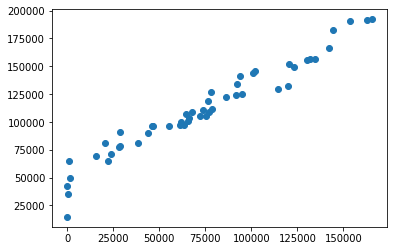

In [49]:
plt.scatter(X,y)
plt.show()

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train)

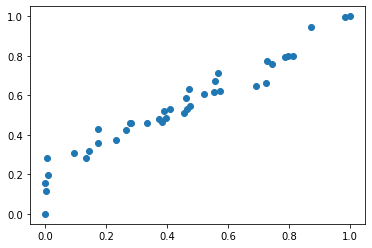

In [52]:
plt.scatter(X_train,y_train)

In [53]:
modelDT = DecisionTreeRegressor(random_state=0)
modelDT.fit(X,y)

DecisionTreeRegressor(random_state=0)

[Text(0.5261948529411765, 0.95, 'X[0] <= 77528.559\nsquared_error = 1592096409.943\nsamples = 50\nvalue = 112012.639'),
 Text(0.20220588235294118, 0.85, 'X[0] <= 25766.925\nsquared_error = 606178582.428\nsamples = 29\nvalue = 85037.441'),
 Text(0.06985294117647059, 0.75, 'X[0] <= 771.14\nsquared_error = 396087083.442\nsamples = 9\nvalue = 55002.026'),
 Text(0.029411764705882353, 0.65, 'X[0] <= 271.025\nsquared_error = 140587463.397\nsamples = 3\nvalue = 30971.513'),
 Text(0.014705882352941176, 0.55, 'squared_error = 194300320.897\nsamples = 2\nvalue = 28620.565'),
 Text(0.04411764705882353, 0.55, 'squared_error = -0.0\nsamples = 1\nvalue = 35673.41'),
 Text(0.11029411764705882, 0.65, 'X[0] <= 8410.595\nsquared_error = 90737755.218\nsamples = 6\nvalue = 67017.282'),
 Text(0.07352941176470588, 0.55, 'X[0] <= 1157.845\nsquared_error = 59562353.052\nsamples = 2\nvalue = 57208.415'),
 Text(0.058823529411764705, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 64926.08'),
 Text(0.08823529411

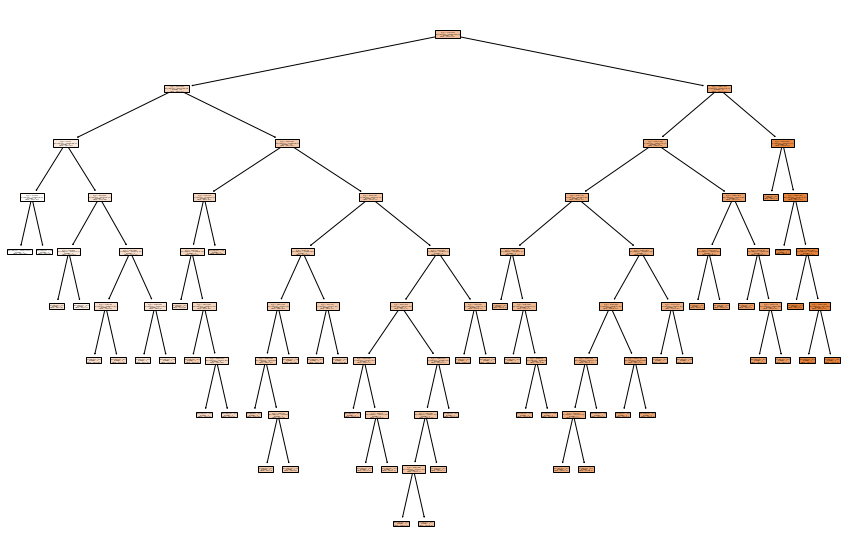

In [54]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(modelDT,filled=True)

In [57]:
X_test

array([[ 66051.52],
       [100671.96],
       [101913.08],
       [ 27892.92],
       [153441.51],
       [ 72107.6 ],
       [ 20229.59],
       [ 61136.38],
       [ 73994.56],
       [142107.34]])

In [58]:
y_pred = modelDT.predict([[165349.20]])
y_pred

array([192261.83])

In [59]:
resgression_model_mse = mean_squared_error(y_test,modelDT.predict(X_test))

print("Mean Squred Error :\t" , math.sqrt(resgression_model_mse))
print("R Squared Value is :\t", modelDT.score(X_train,y_train))

Mean Squred Error :	 0.0
R Squared Value is :	 0.9940670603709082


Text(0, 0.5, 'Predicted Values')

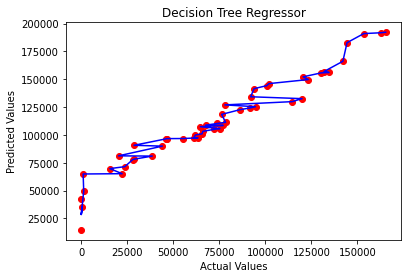

In [60]:
plt.scatter(X,y,color='r')
plt.plot(X,modelDT.predict(X), color='blue')
plt.title("Decision Tree Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")